# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Loadind Data

In [2]:
# Read CSV file into DataFrame
data = pd.read_csv('data/brain_tumor_dataset.csv', index_col = 0)

# Print DataFrame
data

,image_name,mean,variance,std,skewness,kurtosis,entropy,contrast,dissimilarity,homogeneity,asm,energy,correlation,class_name,class
0,image (5).jpg,61.404978,3838.785287,61.957932,0.947800,0.238857,14.884915,456.794107,11.602917,0.322584,0.006458,0.080363,0.940544,no_tumor,0
1,mt_15.jpg,85.822325,8252.643519,90.844062,0.850352,-0.651271,17.351693,129.419093,5.408986,0.476613,0.075636,0.275020,0.992161,meningioma_tumor,2
2,image(214).jpg,42.516818,3767.802299,61.382427,1.438846,1.309734,16.815211,132.465535,4.752191,0.596372,0.254782,0.504760,0.982437,no_tumor,0
3,p (343).jpg,61.010380,2452.392131,49.521633,0.477713,-0.256893,17.441209,61.453243,4.125462,0.432363,0.009812,0.099058,0.987458,pituitary_tumor,3
4,gg (342).jpg,30.124722,1406.812993,37.507506,1.320606,1.318425,16.898935,25.445848,2.229429,0.645524,0.070971,0.266403,0.990962,glioma_tumor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,p (433).jpg,57.453850,1725.060584,41.533849,0.617645,1.086687,17.559813,39.304546,3.051932,0.478069,0.006733,0.082053,0.988592,pituitary_tumor,3
3202,image(90).jpg,39.196328,1860.866781,43.137765,1.389074,2.615294,14.628598,230.485699,7.462348,0.395298,0.071769,0.267897,0.938115,no_tumor,0
3203,image(172).jpg,35.322576,1444.718532,38.009453,1.255980,2.149883,16.545681,119.112805,5.286287,0.467381,0.088983,0.298300,0.958792,no_tumor,0
3204,m3 (238).jpg,55.876904,2996.048083,54.736168,0.745804,-0.180871,17.252259,34.421305,2.834611,0.523024,0.016794,0.129591,0.994256,meningioma_tumor,2


### Basic Description of the Data

In [3]:
# Identification of data types
data.dtypes

image_name        object
mean             float64
variance         float64
std              float64
skewness         float64
kurtosis         float64
entropy          float64
contrast         float64
dissimilarity    float64
homogeneity      float64
asm              float64
energy           float64
correlation      float64
class_name        object
class              int64
dtype: object

In [4]:
# Size of dataset
data.shape

(3206, 15)

In [5]:
# Statistical summary for numeric variables
data.describe()

,mean,variance,std,skewness,kurtosis,entropy,contrast,dissimilarity,homogeneity,asm,energy,correlation,class
count,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000
mean,47.608688,2221.225118,45.822196,0.977076,0.801520,16.814518,92.547582,3.962840,0.520344,0.051279,0.195623,0.980981,1.689644
std,17.327087,1218.046085,11.026758,0.396734,1.238288,0.908800,123.531778,2.327482,0.124798,0.057246,0.114081,0.018808,1.034837
min,9.746657,438.947545,20.951075,-0.623463,-1.754727,13.445660,5.964408,0.924038,0.112608,0.000208,0.014411,0.819560,0.000000
25%,35.782872,1535.219102,39.181872,0.731817,0.035372,16.652575,34.928099,2.614140,0.429574,0.009457,0.097249,0.981639,1.000000
50%,44.340242,1880.874703,43.369051,0.975562,0.619517,17.064186,45.419714,3.173928,0.528064,0.033010,0.181685,0.986516,2.000000
75%,54.261078,2382.808006,48.814014,1.206074,1.364469,17.377381,67.847305,4.159986,0.609653,0.078239,0.279712,0.990005,3.000000
max,137.692507,8380.566340,91.545433,3.639355,14.851446,20.572986,1008.896502,16.233502,0.859618,0.642268,0.801416,0.998185,3.000000


### Target Variable Countplot

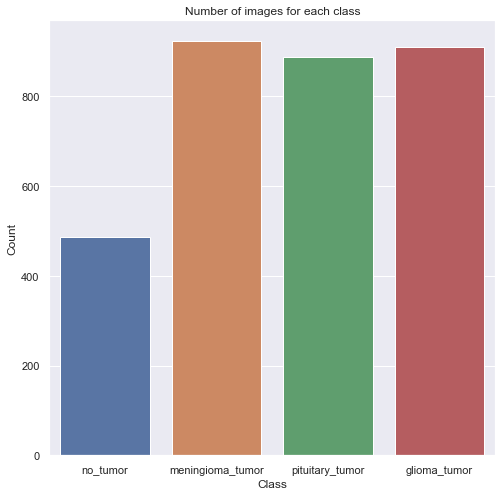

In [6]:
# Adjust figure size
plt.figure(figsize=(8,8))

# Set darkgrid style for all matplotlib and seaborn plots
sns.set_theme(style="darkgrid")

# Show the number of observations in each class
sns.countplot(data = data, x = 'class_name')

# Adjust graph title and labels title
plt.title('Number of images for each class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Feature Correlation Heat Map

<AxesSubplot:>

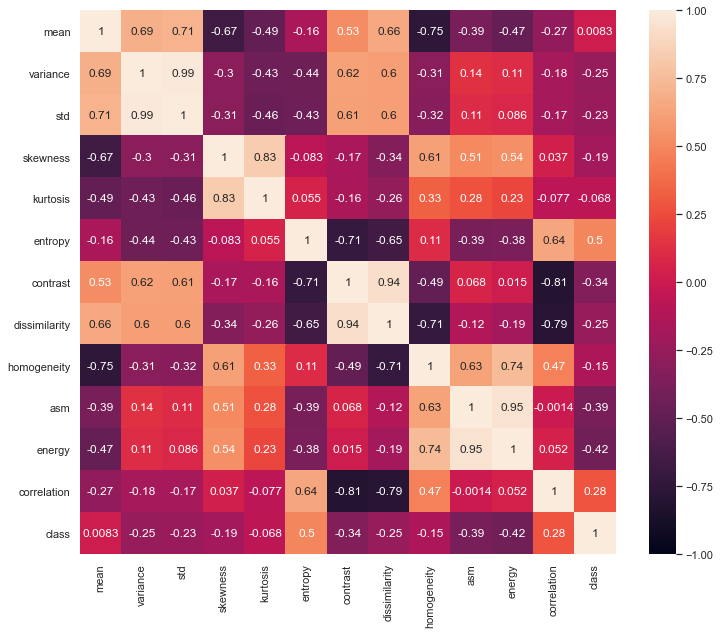

In [7]:
# Adjust figure size
plt.figure(figsize=(12,10))

# Shows a heatmap of the correlation between the variables
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

### Distributions of First Order Features for All Classes

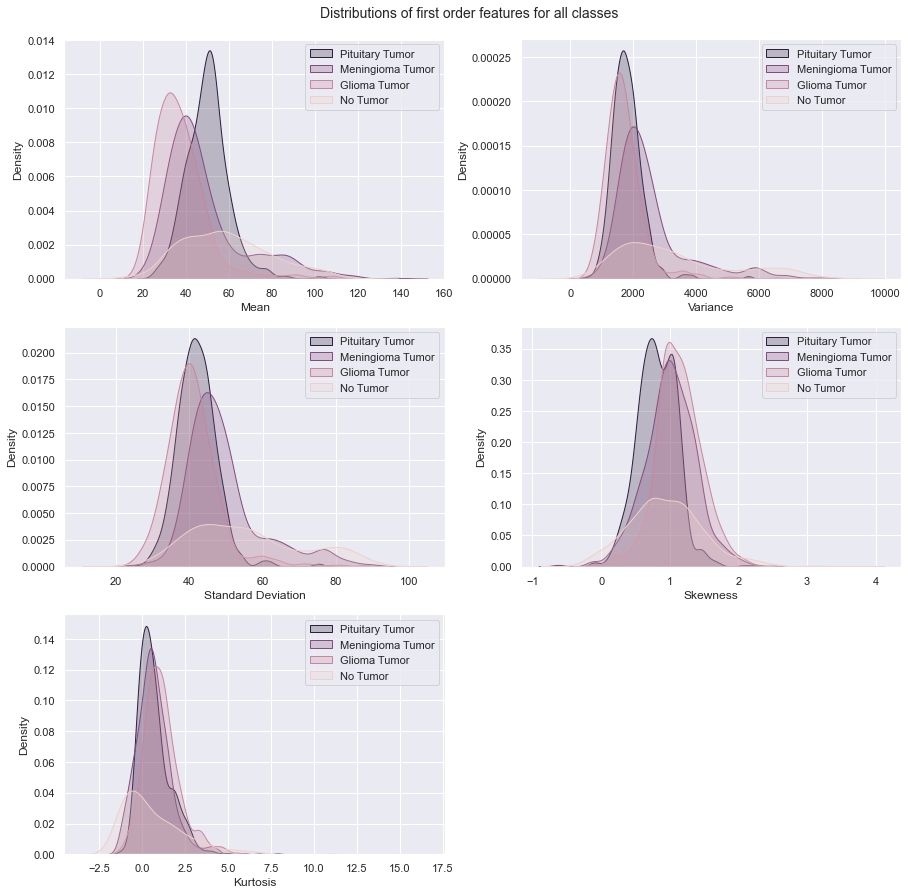

In [8]:
# Adjust figures size
plt.figure(figsize=(15,15))

# Main title for all first order features subplots
plt.suptitle('Distributions of first order features for all classes', fontsize=14, y=0.91)

# Plot mean distribution for each class using kernel densisty estimation
plt.subplot(3,2,1)
sns.kdeplot(data = data, x = 'mean', hue = 'class', shade = True)
plt.xlabel('Mean')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot variance distribution for each class using kernel densisty estimation
plt.subplot(3,2,2)
sns.kdeplot(data = data, x = 'variance', hue = 'class', shade = True)
plt.xlabel('Variance')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot standard deviation distribution for each class using kernel densisty estimation
plt.subplot(3,2,3)
sns.kdeplot(data = data, x = 'std', hue = 'class', shade = True)
plt.xlabel('Standard Deviation')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot skewness distribution for each class using kernel densisty estimation
plt.subplot(3,2,4)
sns.kdeplot(data = data, x = 'skewness', hue = 'class', shade = True)
plt.xlabel('Skewness')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot kurtosis distribution for each class using kernel densisty estimation
plt.subplot(3,2,5)
sns.kdeplot(data = data, x = 'kurtosis', hue = 'class', shade = True)
plt.xlabel('Kurtosis')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

### Distributions of Second Order Features for All Classes

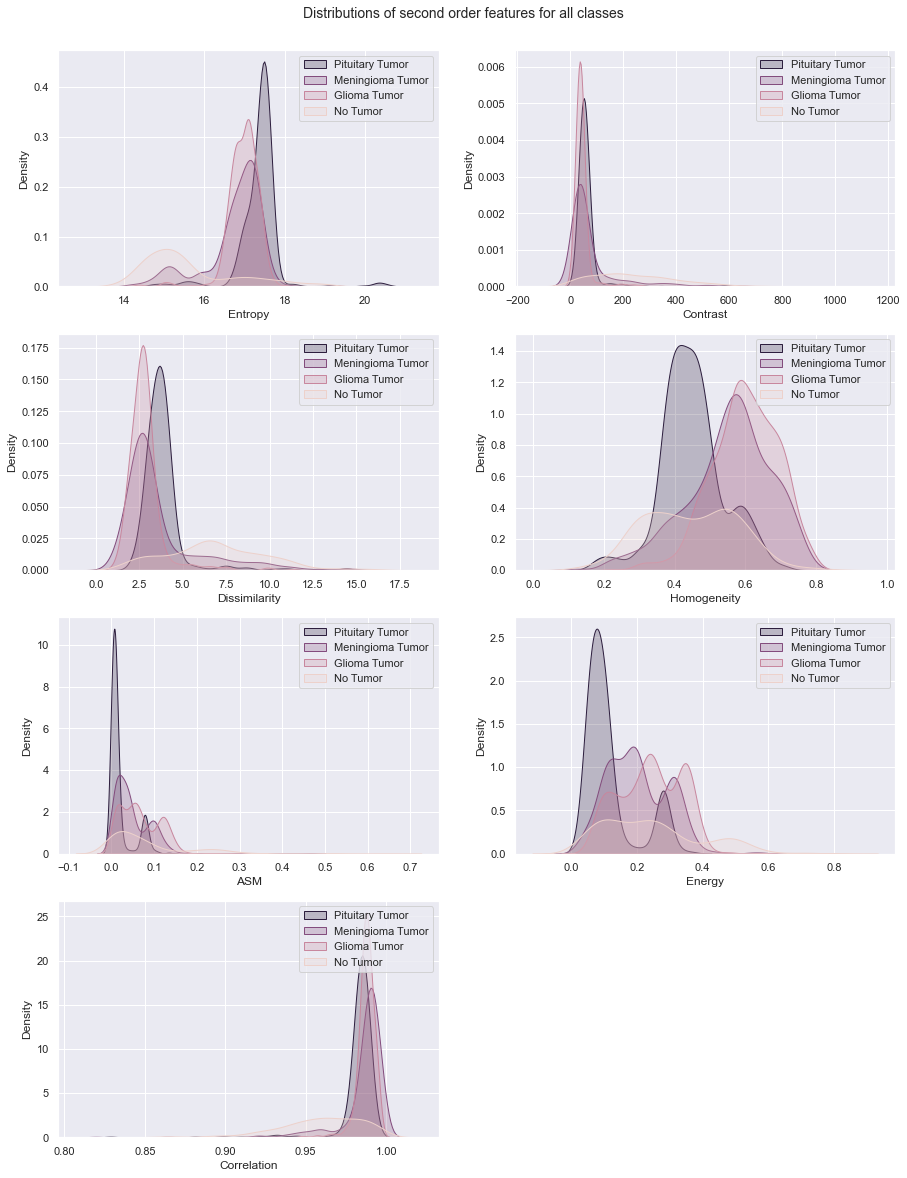

In [9]:
# Adjust figures size
plt.figure(figsize=(15,20))

# Main title for all second order features subplots
plt.suptitle('Distributions of second order features for all classes', fontsize=14, y=0.91)

# Plot entropy distribution for each class using kernel densisty estimation
plt.subplot(4,2,1)
sns.kdeplot(data = data, x = 'entropy', hue = 'class', shade = True)
plt.xlabel('Entropy')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot contrast distribution for each class using kernel densisty estimation
plt.subplot(4,2,2)
sns.kdeplot(data = data, x = 'contrast', hue = 'class', shade = True)
plt.xlabel('Contrast')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot dissimilarity distribution for each class using kernel densisty estimation
plt.subplot(4,2,3)
sns.kdeplot(data = data, x = 'dissimilarity', hue = 'class', shade = True)
plt.xlabel('Dissimilarity')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot homogeneity distribution for each class using kernel densisty estimation
plt.subplot(4,2,4)
sns.kdeplot(data = data, x = 'homogeneity', hue = 'class', shade = True)
plt.xlabel('Homogeneity')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot ASM distribution for each class using kernel densisty estimation
plt.subplot(4,2,5)
sns.kdeplot(data = data, x = 'asm', hue = 'class', shade = True)
plt.xlabel('ASM')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot energy distribution for each class using kernel densisty estimation
plt.subplot(4,2,6)
sns.kdeplot(data = data, x = 'energy', hue = 'class', shade = True)
plt.xlabel('Energy')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])

# Plot correlation distribution for each class using kernel densisty estimation
plt.subplot(4,2,7)
sns.kdeplot(data = data, x = 'correlation', hue = 'class', shade = True)
plt.xlabel('Correlation')
plt.legend(['Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 'No Tumor'])